# Importing

In [169]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [170]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [171]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [173]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [174]:
#checking unique values of each column
for i in df.columns:
  print(i,df[i].nunique())

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
DEATH_EVENT 2


In [175]:
# defining the numeric features in the dataset
df_num=df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

In [176]:
df_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [177]:
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [178]:
#print(df.shape)
print('number of rows:', df.shape[0])
print('number of columns:', df.shape[1])

number of rows: 299
number of columns: 13


In [179]:
# checking missing value in each features
print('Checking missing data:')
df.isnull().any()

Checking missing data:


age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

# Exploration Data Analysis

In [180]:
# defining mean of the numerical features in each categorical features
round(df.groupby(['DEATH_EVENT','sex','anaemia','diabetes','high_blood_pressure','smoking'],as_index=False).mean(),2)

,DEATH_EVENT,sex,anaemia,diabetes,high_blood_pressure,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0,0,0,0,0,0,61.60,464.40,40.90,269571.61,1.63,136.50,180.10
1,0,0,0,0,1,0,54.50,811.62,41.62,329669.75,1.04,138.75,155.25
2,0,0,0,0,1,1,70.00,92.00,60.00,317000.00,0.80,140.00,74.00
3,0,0,0,1,0,0,55.07,592.29,42.79,322239.86,0.99,136.21,204.36
4,0,0,0,1,1,0,57.83,408.17,36.00,333059.67,0.98,136.67,179.83
5,0,0,1,0,0,0,59.91,226.55,46.18,284363.64,1.25,137.91,144.82
6,0,0,1,0,1,0,62.17,386.33,33.33,252333.33,0.97,139.67,94.33
7,0,0,1,1,0,0,58.78,539.44,45.00,259666.67,0.97,137.89,154.78
8,0,0,1,1,1,0,60.28,194.33,40.50,239000.00,0.97,136.50,121.00
9,0,1,0,0,0,0,60.67,407.50,38.58,226113.17,1.19,137.08,182.08


In [181]:
# defining death event as label and the numeric features in data
df_DE_and_num=df[['DEATH_EVENT','age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

In [182]:
# defining mean of the numerical features in each death event labels
#df_DE_and_num.groupby(['DEATH_EVENT'],as_index=False).mean()
df_group_DE = round(df_DE_and_num.groupby(['DEATH_EVENT'],as_index=False).mean(),2)
df_group_DE

,DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0,58.76,540.05,40.27,266657.49,1.18,137.22,158.34
1,1,65.22,670.20,33.47,256381.04,1.84,135.38,70.89


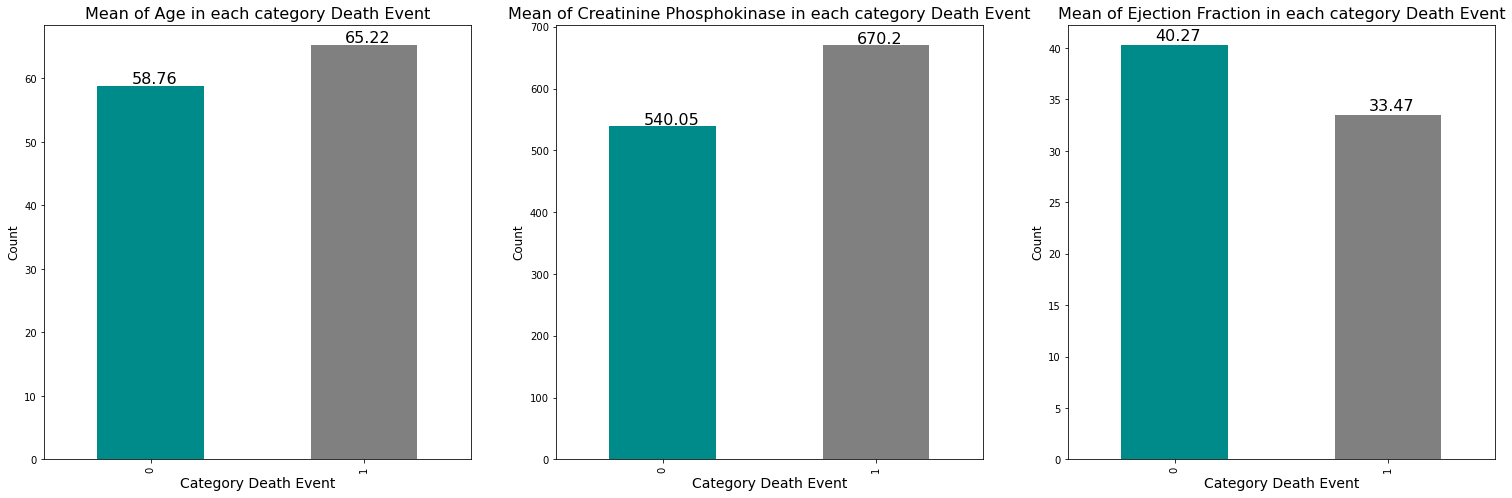

In [183]:
# Bar chart visualization of the mean numerical feature in each death event labels

f, axes = plt.subplots(ncols=3, figsize=(26, 8))

df_group_DE['age'].plot(kind="bar",color=['darkcyan', 'grey'], ax=axes[0])
axes[0].set_title('Mean of Age in each category Death Event', fontsize = 16)
axes[0].set_xlabel('Category Death Event', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[0].text(i.get_x()+.16, i.get_height()+.5, \
            str(i.get_height()), fontsize=16,
                color='black')

df_group_DE['creatinine_phosphokinase'].plot(kind="bar", color=['darkcyan', 'grey'], ax=axes[1])
axes[1].set_title('Mean of Creatinine Phosphokinase in each category Death Event', fontsize = 16)
axes[1].set_xlabel('Category Death Event', fontsize = 14)
axes[1].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[1].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[1].text(i.get_x()+.16, i.get_height()+2.5, \
            str(i.get_height()), fontsize=16,
                color='black')

df_group_DE['ejection_fraction'].plot(kind="bar",color=['darkcyan', 'grey'], ax=axes[2])
axes[2].set_title('Mean of Ejection Fraction in each category Death Event', fontsize = 16)
axes[2].set_xlabel('Category Death Event', fontsize = 14)
axes[2].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[2].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[2].text(i.get_x()+.16, i.get_height()+.5, \
            str(i.get_height()), fontsize=16,
                color='black')

plt.show()


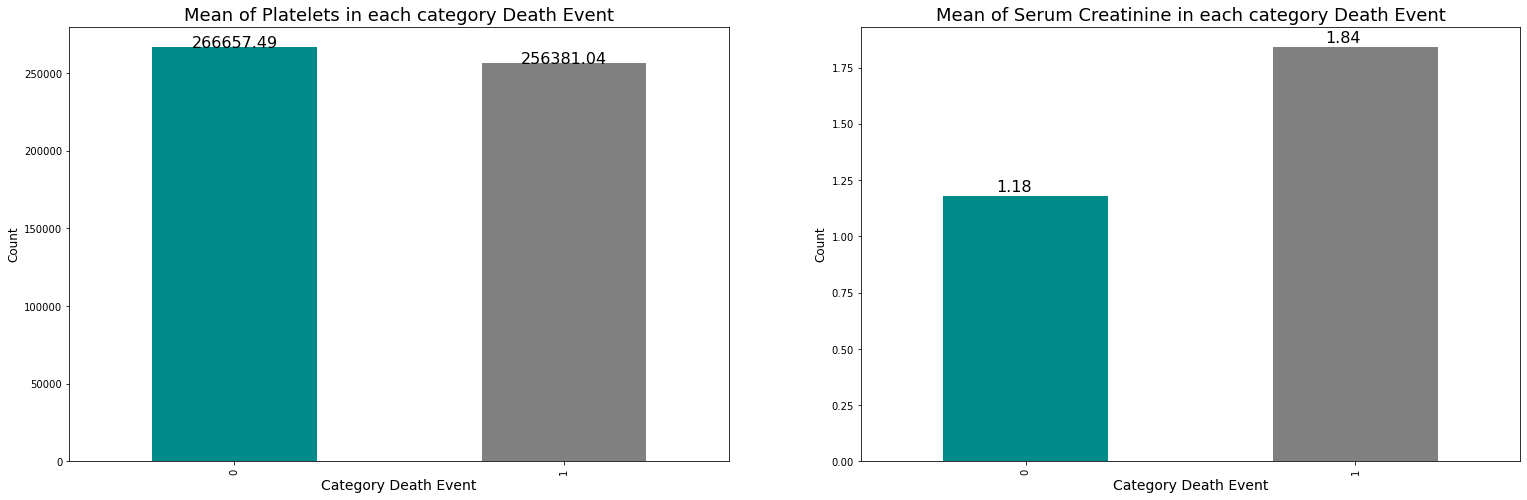

In [184]:
# Bar chart visualization of the mean numerical feature in each death event labels

f, axes = plt.subplots(ncols=2, figsize=(26, 8))

df_group_DE['platelets'].plot(kind="bar", color=['darkcyan', 'grey'], ax=axes[0])
axes[0].set_title('Mean of Platelets in each category Death Event', fontsize = 18)
axes[0].set_xlabel('Category Death Event', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[0].text(i.get_x()+.12, i.get_height()+1.5, \
            str(i.get_height()), fontsize=16,
                color='black')

df_group_DE['serum_creatinine'].plot(kind="bar",color=['darkcyan', 'grey'], ax=axes[1])
axes[1].set_title('Mean of Serum Creatinine in each category Death Event', fontsize = 18)
axes[1].set_xlabel('Category Death Event', fontsize = 14)
axes[1].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[1].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[1].text(i.get_x()+.16, i.get_height()+.02, \
            str(i.get_height()), fontsize=16,
                color='black')

plt.show()

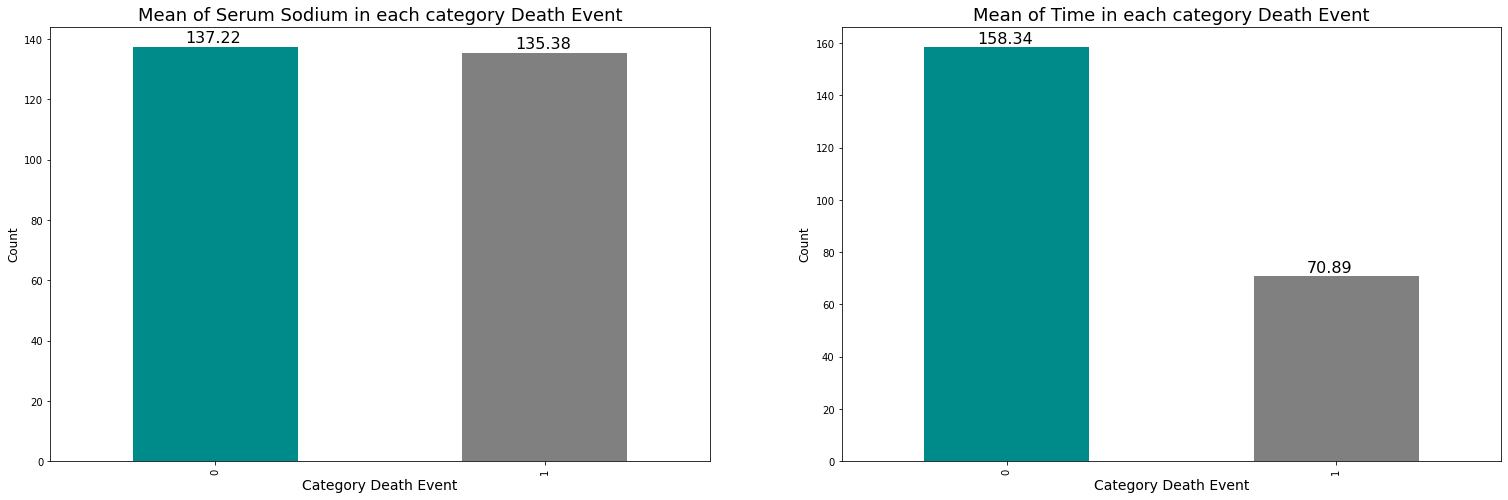

In [185]:
# Bar chart visualization of the mean numerical feature in each death event labels

f, axes = plt.subplots(ncols=2, figsize=(26, 8))

df_group_DE['serum_sodium'].plot(kind="bar", color=['darkcyan', 'grey'], ax=axes[0])
axes[0].set_title('Mean of Serum Sodium in each category Death Event', fontsize = 18)
axes[0].set_xlabel('Category Death Event', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[0].text(i.get_x()+.16, i.get_height()+1.5, \
            str(i.get_height()), fontsize=16,
                color='black')

df_group_DE['time'].plot(kind="bar",color=['darkcyan', 'grey'], ax=axes[1])
axes[1].set_title('Mean of Time in each category Death Event', fontsize = 18)
axes[1].set_xlabel('Category Death Event', fontsize = 14)
axes[1].set_ylabel('Count', fontsize = 12)
# set individual bar lables 
for i in axes[1].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[1].text(i.get_x()+.16, i.get_height()+1.5, \
            str(i.get_height()), fontsize=16,
                color='black')

plt.show()

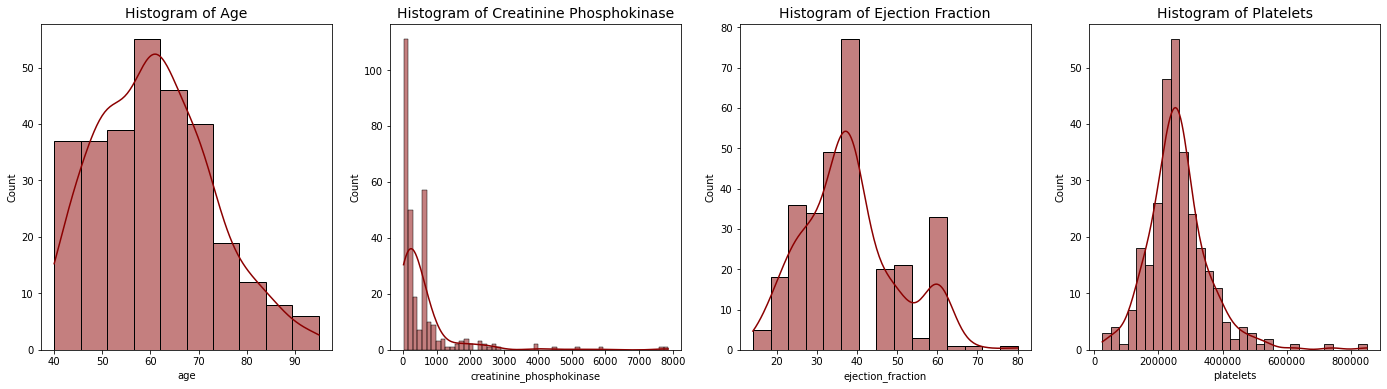

In [186]:
# Histogram visualization of numerical feature

f, axes = plt.subplots(ncols=4, figsize=(24, 6))

sns.histplot(x='age', color='darkred', kde=True, data=df,ax=axes[0])
axes[0].set_title('Histogram of Age', fontsize = 14)

sns.histplot(x='creatinine_phosphokinase', color='darkred', kde=True, data=df,ax=axes[1])
axes[1].set_title('Histogram of Creatinine Phosphokinase', fontsize = 14)

sns.histplot(x='ejection_fraction', color='darkred', kde=True, data=df,ax=axes[2])
axes[2].set_title('Histogram of Ejection Fraction', fontsize = 14)

sns.histplot(x='platelets', color='darkred', kde=True, data=df,ax=axes[3])
axes[3].set_title('Histogram of Platelets', fontsize = 14)

plt.show()


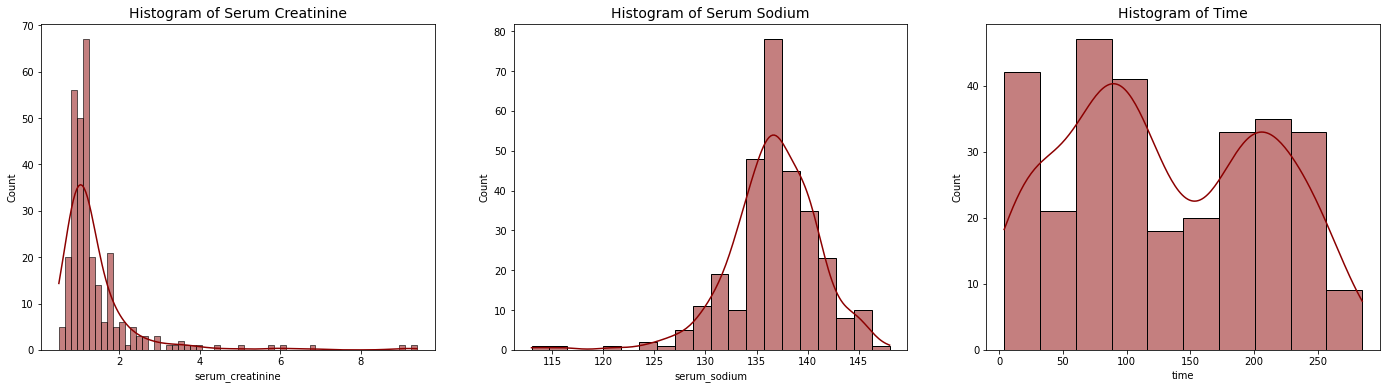

In [187]:
# Histogram visualization of numerical feature

f, axes = plt.subplots(ncols=3, figsize=(24, 6))

sns.histplot(x='serum_creatinine', color='darkred', kde=True, data=df,ax=axes[0])
axes[0].set_title('Histogram of Serum Creatinine', fontsize = 14)

sns.histplot(x='serum_sodium', color='darkred', kde=True, data=df,ax=axes[1])
axes[1].set_title('Histogram of Serum Sodium', fontsize = 14)

sns.histplot(x='time', color='darkred', kde=True, data=df,ax=axes[2])
axes[2].set_title('Histogram of Time', fontsize = 14)

plt.show()

Categorial

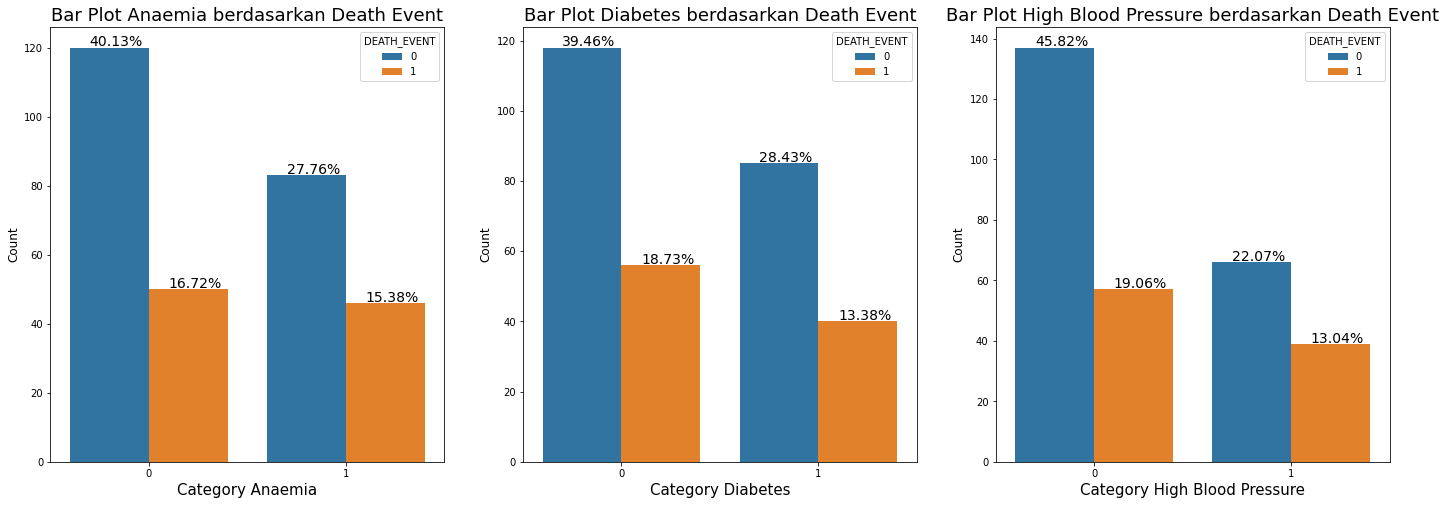

In [188]:
f, axes = plt.subplots(ncols=3, figsize=(24, 8))

# BARCHART ANAEMIA vs DEATH EVENT
sns.countplot(x='anaemia',hue='DEATH_EVENT', data=df, ax=axes[0])
axes[0].set_title('Bar Plot Anaemia berdasarkan Death Event', fontsize = 18)
axes[0].set_xlabel('Category Anaemia', fontsize = 15)
axes[0].set_ylabel('Count', fontsize = 12)
totals0 = []
# find the values and append to list
for i in axes[0].patches:
    totals0.append(i.get_height())
# set individual bar lables using above list    
total0 = sum(totals0)
for i in axes[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[0].text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total0)*100, 2))+'%', fontsize=14,
                color='black')

# BARCHART DIABETES vs DEATH EVENT
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df, ax=axes[1])
axes[1].set_title('Bar Plot Diabetes berdasarkan Death Event', fontsize = 18)
axes[1].set_xlabel('Category Diabetes', fontsize = 15)
axes[1].set_ylabel('Count', fontsize = 12)
totals1 = []
# find the values and append to list
for i in axes[1].patches:
    totals1.append(i.get_height())
# set individual bar lables using above list    
total1 = sum(totals1)
for i in axes[1].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[1].text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total1)*100, 2))+'%', fontsize=14,
                color='black')

# BARCHART HIGH BLOOD PRESSURE vs DEATH EVENT
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT', data=df, ax=axes[2])
axes[2].set_title('Bar Plot High Blood Pressure berdasarkan Death Event', fontsize = 18)
axes[2].set_xlabel('Category High Blood Pressure', fontsize = 15)
axes[2].set_ylabel('Count', fontsize = 12)
totals2 = []
# find the values and append to list
for i in axes[2].patches:
    totals2.append(i.get_height())
# set individual bar lables using above list    
total2 = sum(totals2)
for i in axes[2].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[2].text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total2)*100, 2))+'%', fontsize=14,
                color='black')

plt.show()


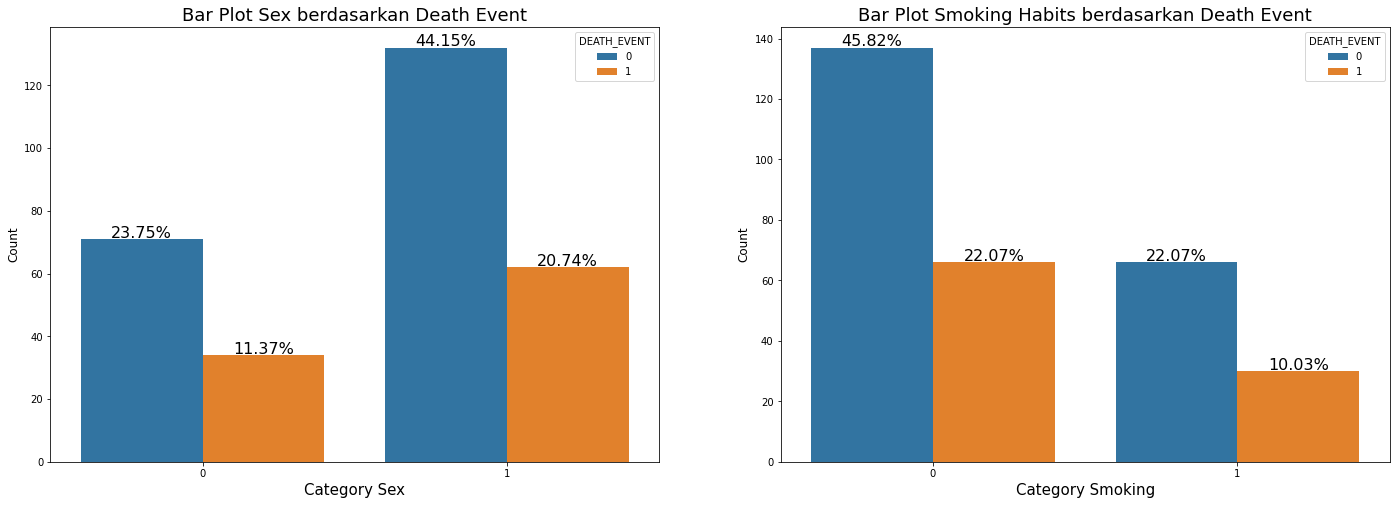

In [189]:
f, axes = plt.subplots(ncols=2, figsize=(24, 8))

# BARCHART SEX vs DEATH EVENT
sns.countplot(x='sex',hue='DEATH_EVENT', data=df, ax=axes[0])
axes[0].set_title('Bar Plot Sex berdasarkan Death Event', fontsize = 18)
axes[0].set_xlabel('Category Sex', fontsize = 15)
axes[0].set_ylabel('Count', fontsize = 12)
totals0 = []
# find the values and append to list
for i in axes[0].patches:
    totals0.append(i.get_height())
# set individual bar lables using above list    
total0 = sum(totals0)
for i in axes[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[0].text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total0)*100, 2))+'%', fontsize=16,
                color='black')

# BARCHART SMOKING vs DEATH EVENT
sns.countplot(x='smoking',hue='DEATH_EVENT', data=df, ax=axes[1])
axes[1].set_title('Bar Plot Smoking Habits berdasarkan Death Event', fontsize = 18)
axes[1].set_xlabel('Category Smoking', fontsize = 15)
axes[1].set_ylabel('Count', fontsize = 12)
totals1 = []
# find the values and append to list
for i in axes[1].patches:
    totals1.append(i.get_height())
# set individual bar lables using above list    
total1 = sum(totals1)
for i in axes[1].patches:
    # get_x pulls left or right; get_height pushes up or down
    axes[1].text(i.get_x()+.1, i.get_height()+.5, \
            str(round((i.get_height()/total1)*100, 2))+'%', fontsize=16,
                color='black')

plt.show()


# Outlier Detection 

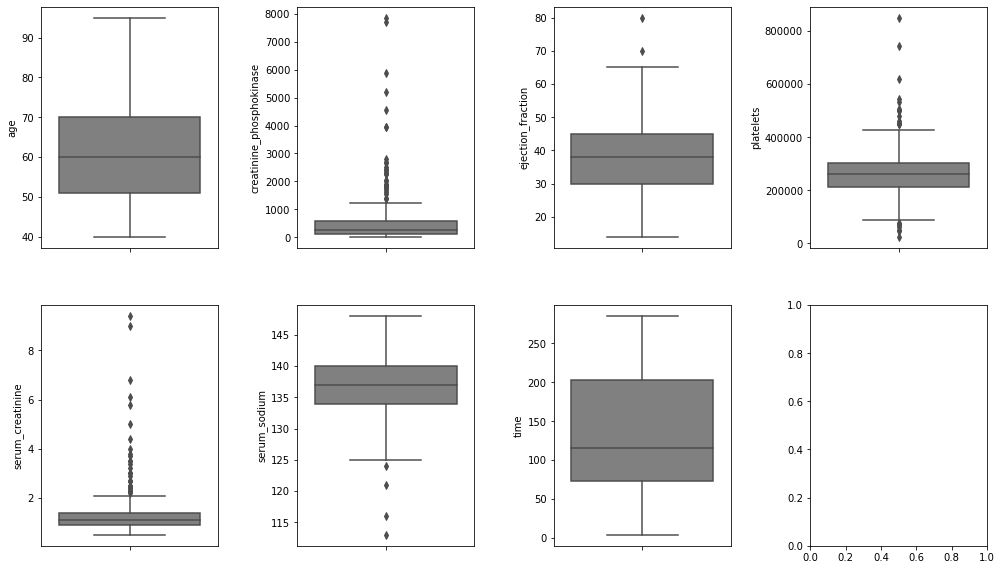

In [190]:
# Boxplot visualization for outlier detection

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(14, 8))
index = 0
axs = axs.flatten()

for k,v in df_num.items():
    sns.boxplot(y=k, color='grey', data=df_num, ax=axs[index])
    index += 1
    plt.tight_layout(pad=1, w_pad=2, h_pad=5.0)


In [191]:
# defines outlier
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df_num[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]
    

In [192]:
# displays data based on outliers in the Creatinine Phosphokine
detect_outliers(df_num,'creatinine_phosphokinase').sort_values(by=['creatinine_phosphokinase'])[['creatinine_phosphokinase']]
#[23,..., 7861]

,creatinine_phosphokinase
46,1380
176,1419
139,1548
147,1610
283,1688
200,1767
130,1808
295,1820
153,1846
107,1876


In [193]:
# displays data based on outliers in the Ejection Fraction
detect_outliers(df_num,'ejection_fraction').sort_values(by=['ejection_fraction'])[['ejection_fraction']]
#[14,..., 80]

,ejection_fraction
217,70
64,80


In [194]:
# displays data based on outliers in the Platelets
detect_outliers(df_num,'platelets').sort_values(by=['platelets'])[['platelets']]
#[25.01,..., 850.00]

,platelets
277,25100.0
15,47000.0
281,51000.0
230,62000.0
167,70000.0
200,73000.0
163,75000.0
162,448000.0
47,451000.0
279,451000.0


In [195]:
# displays data based on outliers in the Serum Creatinine
detect_outliers(df_num,'serum_creatinine').sort_values(by=['serum_creatinine'])[['serum_creatinine']]
#[0.50,..., 9.40]

,serum_creatinine
54,2.2
104,2.3
38,2.3
61,2.3
247,2.4
167,2.4
82,2.5
183,2.5
150,2.5
281,2.7


In [196]:
# displays data based on outliers in the Serum Sodium
detect_outliers(df_num,'serum_sodium').sort_values(by=['serum_sodium'])[['serum_sodium']]
#[114,..., 148]

,serum_sodium
199,113
4,116
19,121
126,124


All above are expected are outliers based on given data.When I researched a little bit, I found that all of the outliers values were within the possible range of values. So the step taken in this case is to keep the value in the dataset.

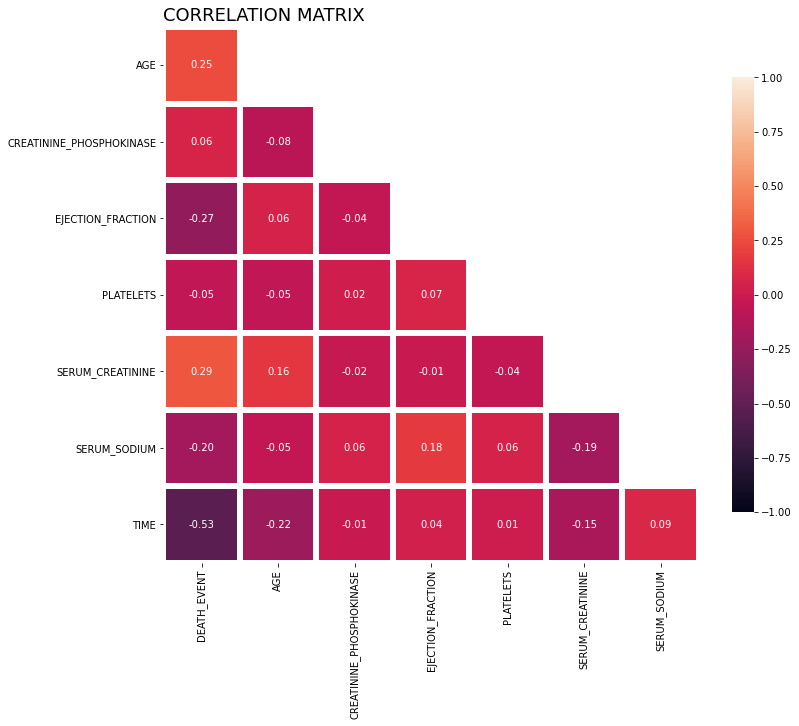

In [197]:
df_corr=df_DE_and_num.corr()
np.ones_like(df_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# yticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()

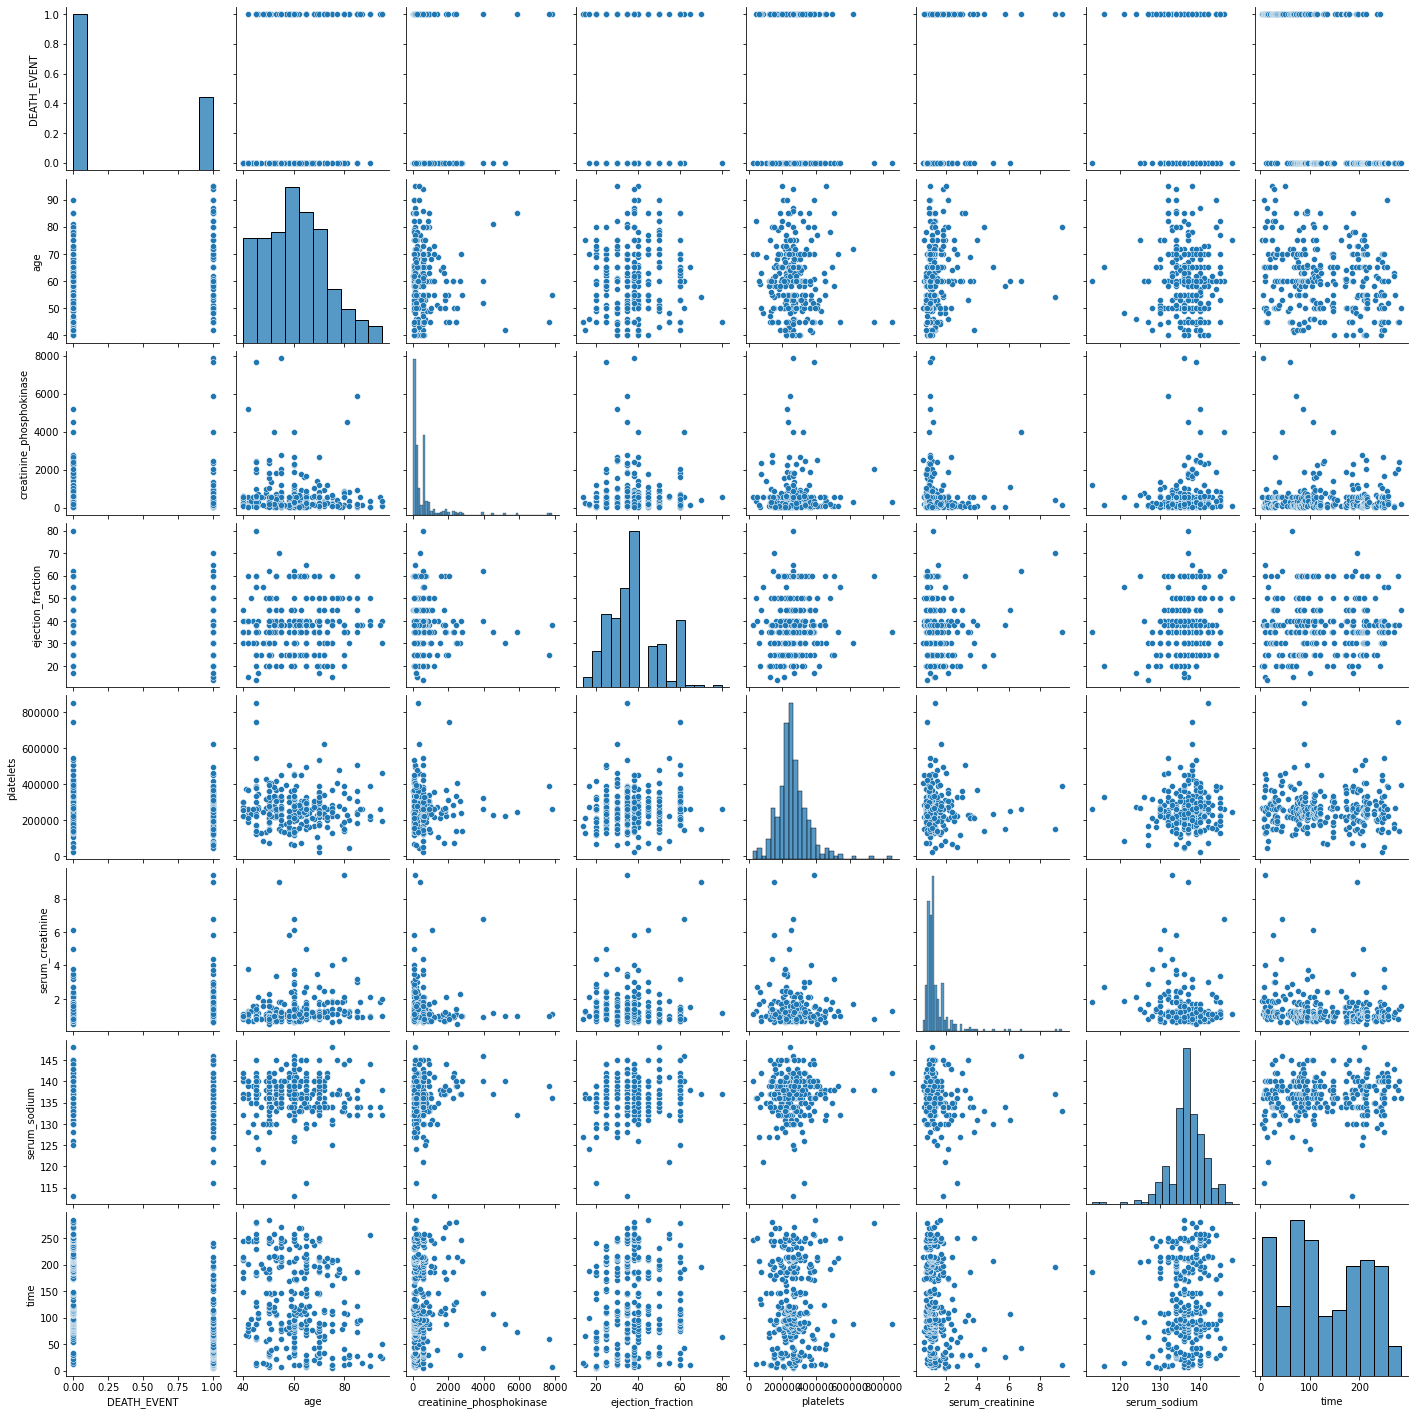

In [198]:
sns.pairplot(df_DE_and_num)

In [199]:
# numerical feature with higher correlation to death event
corr[abs(df_corr['DEATH_EVENT']) > 0.24]['DEATH_EVENT']

<ipython-input-199-49597bd3df97>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr[abs(df_corr['DEATH_EVENT']) > 0.24]['DEATH_EVENT']


age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
Name: DEATH_EVENT, dtype: float64

Relationship between Categorical Features

In [200]:
df_category=df[['sex','anaemia','diabetes','high_blood_pressure','smoking']]

In [201]:
df_category.head()

,sex,anaemia,diabetes,high_blood_pressure,smoking
0,1,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,1
3,1,1,0,0,0
4,0,1,1,0,0


In [202]:
#it will returns f score and p value 
f_score=chi2(df_category,df[['DEATH_EVENT']])   
f_score

(array([1.95626598e-03, 7.46593411e-01, 6.56814450e-04, 1.22153853e+00,
        3.23468288e-02]),
 array([0.96472131, 0.38755692, 0.97955374, 0.26905893, 0.85726857]))

In [203]:
# printing p values for each categorical features
p_value = pd.Series(f_score[1],index=df_category.columns)
p_value.sort_values(ascending=True,inplace=True)
p_value

high_blood_pressure    0.269059
anaemia                0.387557
smoking                0.857269
sex                    0.964721
diabetes               0.979554
dtype: float64

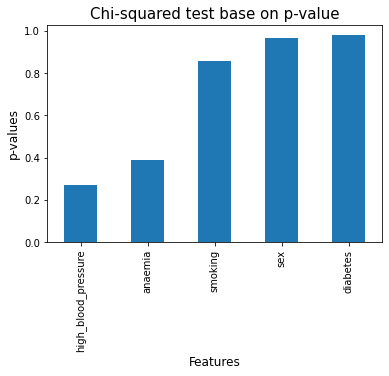

In [204]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=12)
plt.ylabel("p-values",fontsize=12)
plt.title("Chi-squared test base on p-value", fontsize=15)
plt.show()

If we see above plot we can conclude that all categorical features in df_cat has p-value > 0.05 hence all categorical features does not have significance on target variable (death event)

# Normalisation

In [205]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [206]:
StandardScaler = StandardScaler()
columns_to_scale=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [207]:
# data after normalization
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


# Modelling

In [208]:
accuracy_list = []
algorithm = []
predict_list = []

In [209]:
# defines X and y
X=df.drop(['DEATH_EVENT'], axis = 1)
y=df['DEATH_EVENT']

In [210]:
# defines Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 12) (239,)
Test set: (60, 12) (60,)


# KNN

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc_train = np.zeros((Ks-1))
mean_acc_test = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_train=neigh.predict(X_train)
    yhat_test=neigh.predict(X_test)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train, yhat_train)
    mean_acc_test[n-1] = metrics.accuracy_score(y_test, yhat_test) 
    std_acc[n-1]=np.std(yhat_test==y_test)/np.sqrt(yhat_test.shape[0])

accuracy_list.append(neigh.score(X_test,y_test))
algorithm.append("K Nearest Neighbours")
print("Training accuracy", np.round(mean_acc_train,3))
print("Testing accuracy", np.round(mean_acc_test,3))


Training accuracy [1.    0.837 0.891 0.837 0.858 0.799 0.82  0.795 0.799]
Testing accuracy [0.717 0.717 0.733 0.75  0.75  0.767 0.75  0.767 0.75 ]


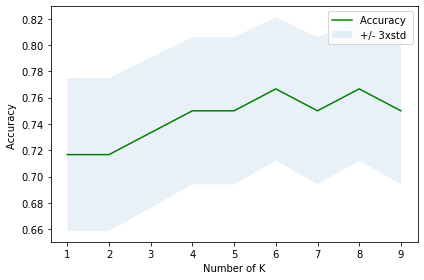

In [212]:
plt.plot(range(1,Ks),mean_acc_test,'g')
plt.fill_between(range(1,Ks),mean_acc_test - 1 * std_acc,mean_acc_test + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [213]:
print( "The best accuracy value is", np.round(mean_acc_test.max(),3), "with k=", mean_acc_test.argmax()+1) 

The best accuracy value is 0.767 with k= 6


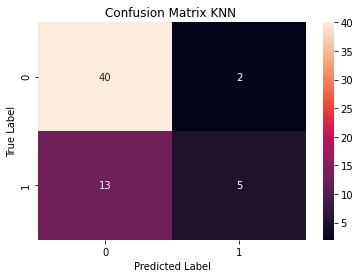

In [214]:
# use the best k
k = 6

# predict  
yhat = neigh.predict(X_test)

# matrix confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,yhat)
predict_list.append(cm_knn.item(0)+cm_knn.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_knn, annot = True, fmt='.0f', ax = ax)
plt.title('Confusion Matrix KNN ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [215]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        42
           1       0.71      0.28      0.40        18

    accuracy                           0.75        60
   macro avg       0.73      0.62      0.62        60
weighted avg       0.74      0.75      0.71        60



we get the KNN model with an accuracy of 0.75

# Logistic Regression

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# predict
yhat_test = LR.predict(X_test)

In [218]:
# probability of the predict
yhat_prob = LR.predict_proba(X_test)
yhat_prob
accuracy_list.append(LR.score(X_test,y_test))
algorithm.append("Logistic Regression")

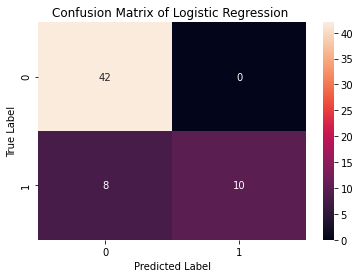

In [219]:
# matrix confusion
cm_logreg = confusion_matrix(y_test,yhat_test)
predict_list.append(cm_logreg.item(0)+cm_logreg.item(2))

f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm_logreg, annot = True)
plt.title('Confusion Matrix of Logistic Regression ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [220]:
from sklearn.metrics import accuracy_score

mylist = []
ac_train = accuracy_score(y_train, yhat_train)
ac_test = accuracy_score(y_test, yhat_test)
mylist.append(ac_train)
mylist.append(ac_test)
print('Accuracy training:', np.round(ac_train,3))
print('Accuracy testing:', np.round(ac_test,3))

Accuracy training: 0.799
Accuracy testing: 0.867


In [221]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        42
           1       1.00      0.56      0.71        18

    accuracy                           0.87        60
   macro avg       0.92      0.78      0.81        60
weighted avg       0.89      0.87      0.85        60



For Logistic Regression model,we get an accuracy of 0.87

# Naive Bayes

test accuracy:  0.7833333333333333


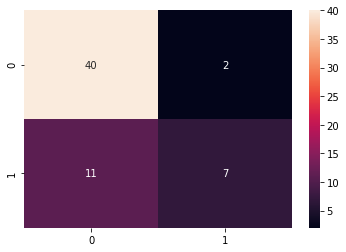

In [222]:
nb = GaussianNB()
nb.fit(X_train,y_train)
print("test accuracy: ",nb.score(X_test,y_test))
accuracy_list.append(nb.score(X_test,y_test))
algorithm.append("Native Bayes ")

cm_NaB = confusion_matrix(y_test,nb.predict(X_test))
predict_list.append(cm_NaB.item(0)+cm_NaB.item(2))
sns.heatmap(cm_NaB,annot=True)
plt.show()

# Decision Tree

test accuracy:  0.7833333333333333


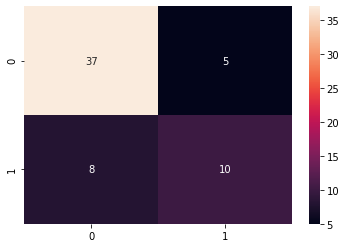

In [223]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("test accuracy: ",dt.score(X_test,y_test))
accuracy_list.append(dt.score(X_test,y_test))
algorithm.append("Decision Tree")

cm_DT = confusion_matrix(y_test,dt.predict(X_test))
predict_list.append(cm_DT.item(0)+cm_DT.item(2))
sns.heatmap(cm_DT,annot=True)
plt.show()

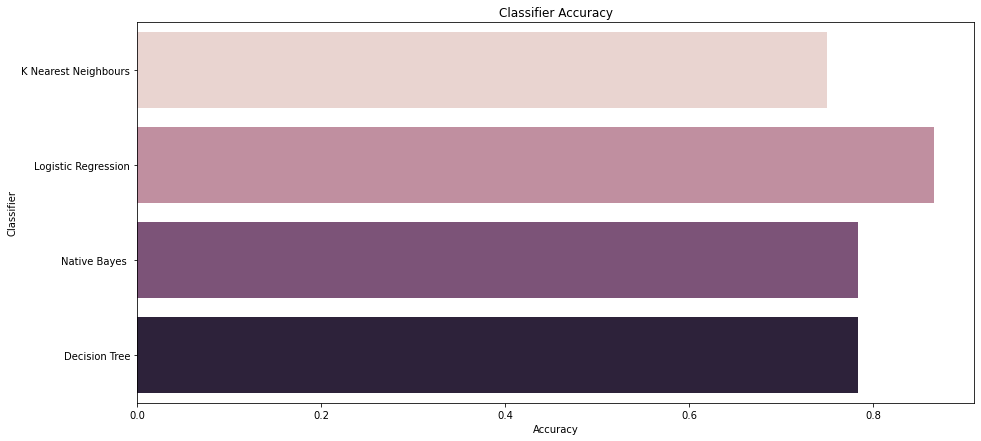

In [224]:
#Classifier Accuracy
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy_list,y=algorithm,palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

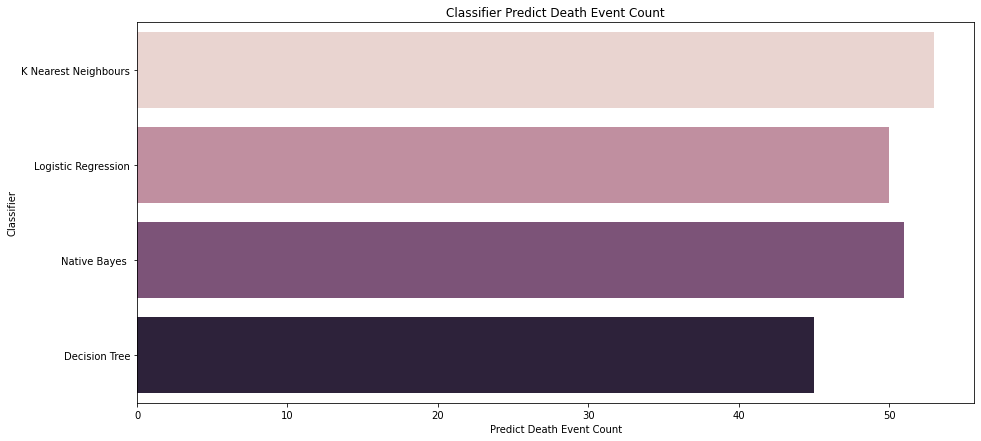

In [225]:
#Classifier Predict Death Event Count
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=predict_list,y=algorithm,palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Predict Death Event Count")
plt.ylabel("Classifier")
plt.title('Classifier Predict Death Event Count')
plt.show()